In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/Users/ehast/Downloads/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Set a seed
np.random.seed(421)

# Take a random sample of 25 observations
sample_size = 25
sample = diabetes_data.sample(sample_size)

# Calculate mean and max Glucose values for both sample and population
mean_glucose_sample = sample['Glucose'].mean()
max_glucose_sample = sample['Glucose'].max()
mean_glucose_population = diabetes_data['Glucose'].mean()
max_glucose_population = diabetes_data['Glucose'].max()

/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

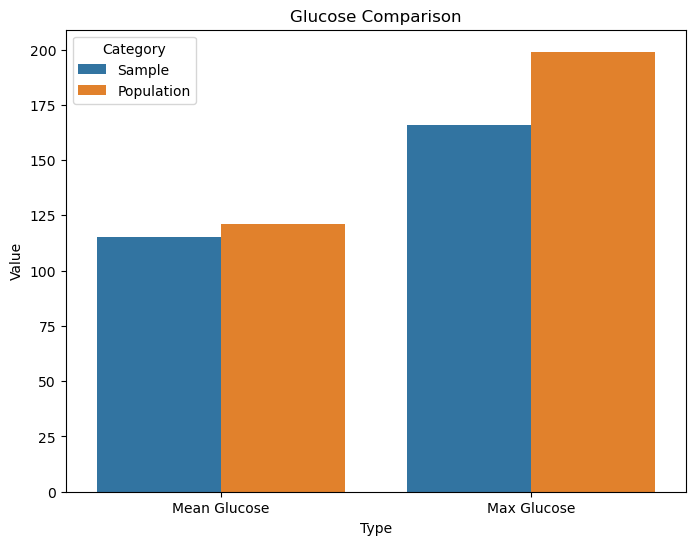

In [8]:
# Prepare data for plotting
glucose_data = pd.DataFrame({
    'Type': ['Mean Glucose', 'Max Glucose'] * 2,
    'Value': [mean_glucose_sample, max_glucose_sample, mean_glucose_population, max_glucose_population],
    'Category': ['Sample', 'Sample', 'Population', 'Population']
})

# Plotting Glucose Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Value', hue='Category', data=glucose_data)
plt.title('Glucose Comparison')
plt.show()


In [4]:
# Find the 98th percentile of BMI for both sample and population
percentile_98_sample = np.percentile(sample['BMI'], 98)
percentile_98_population = np.percentile(diabetes_data['BMI'], 98)

/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


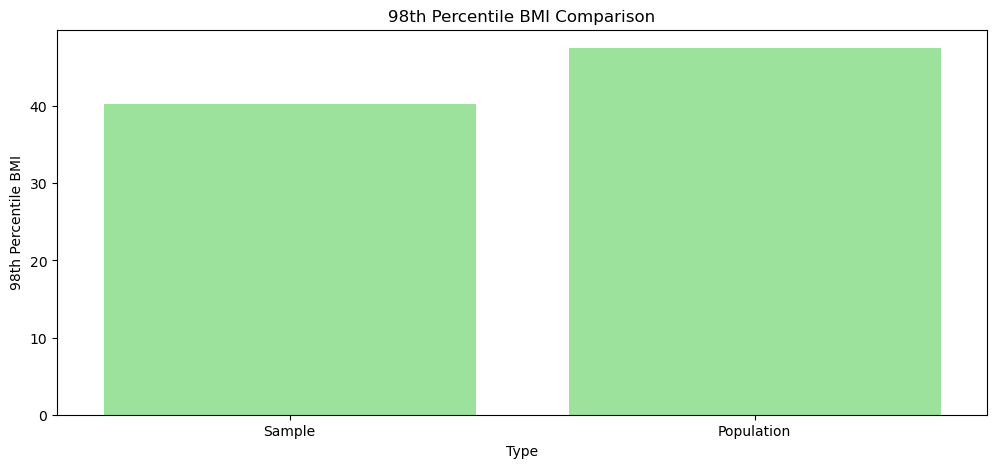

In [9]:
# Prepare data for BMI comparison
bmi_data = pd.DataFrame({
    'Type': ['Sample', 'Population'],
    '98th Percentile BMI': [percentile_98_sample, percentile_98_population]
})

# Plotting BMI Comparison
plt.figure(figsize=(12, 5))
sns.barplot(x='Type', y='98th Percentile BMI', data=bmi_data, color='lightgreen')
plt.title('98th Percentile BMI Comparison')
plt.show()


In [5]:
from sklearn.utils import resample

# Bootstrap analysis for BloodPressure
n_iterations = 500
n_size = 150

# Arrays to store statistics
means = np.zeros(n_iterations)
std_devs = np.zeros(n_iterations)
percentiles = np.zeros(n_iterations)

for i in range(n_iterations):
    # Prepare bootstrap sample
    boot_sample = resample(diabetes_data, n_samples=n_size, replace=True)
    # Calculate and store statistics
    means[i] = boot_sample['BloodPressure'].mean()
    std_devs[i] = boot_sample['BloodPressure'].std()
    percentiles[i] = np.percentile(boot_sample['BloodPressure'], 50)  # 50th percentile (median)

# Population statistics for Blood Pressure
mean_bp_population = diabetes_data['BloodPressure'].mean()
std_bp_population = diabetes_data['BloodPressure'].std()
percentile_50_bp_population = np.percentile(diabetes_data['BloodPressure'], 50)

/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ehast/anaconda3/envs/CapstoneWork/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

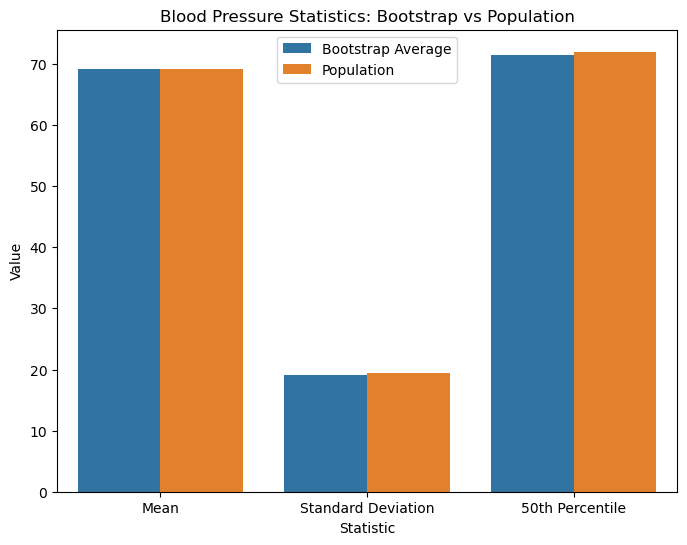

In [11]:
# Prepare data for Blood Pressure statistics comparison
bp_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', '50th Percentile'] * 2,
    'Value': [means.mean(), std_devs.mean(), percentiles.mean(), 
              mean_bp_population, std_bp_population, percentile_50_bp_population],
    'Category': ['Bootstrap Average'] * 3 + ['Population'] * 3
})

# Plotting Blood Pressure Statistics Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Statistic', y='Value', hue='Category', data=bp_stats)
plt.title('Blood Pressure Statistics: Bootstrap vs Population')
plt.legend()
plt.show()


In [ ]:
# The bootstrap is clearly the most effective of the three methods at simulating the population statistics. 
# I believe this is because of the added number of data by the bootstrap method, that decreases the difference.